<a href="https://colab.research.google.com/github/ak0982/AI-assignment/blob/master/Assignmnt_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMEMNT 6              
NAME-->AMAR KUMAR            
ROLL NO--> 1801016**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from sklearn.model_selection import train_test_split as tts
from math import sqrt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import random
from sklearn.datasets import load_iris



# Q1.Single layer perceptron for Iris Dataset

In [28]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',  names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
X = dataset.iloc[:,0:4]
Y = pd.DataFrame(dataset.iloc[:,-1])

In [30]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
labels = {0:"Iris-setosa",1:"Iris-versicolor",2:"Iris-virginica"}
lb = LabelEncoder()
Y['class'] = lb.fit_transform(Y)
Y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [32]:
#threshold Activation Function

def Activation(input,weight):
  total_sum=np.dot(input,weight[1:])+weight[0]
  if total_sum>0:
    activation=1
  else :
    activation=0
  return activation

In [33]:
#Train model


def Train_model(input,output,epoch,learning_rate):
  weight = []
  for i in range(input.shape[1]+1):
    weight.append(round(random.uniform(-0.3,0.3),2))

  for _ in range(epoch):
    for inputs,outputs in zip(input,output):
      activation=Activation(inputs,weight)
      sum = learning_rate * (outputs-activation)
      weight[1:]+=sum * inputs 
      weight[0]+=sum

  return weight

In [34]:
#prediction 


def predict(X,w):
    Y_pred = np.empty((X.shape[0], 0))
    for i in range(len(w)):
        Y_pred = np.append(Y_pred, (np.dot(X, w[i])), axis=1)
    
    return np.argmax(Y_pred, axis=1).reshape(X.shape[0], 1)

In [35]:
#Finding Accuracy

def Accuracy(Y_pred,y):
    difference = Y_pred - np.array(y)
    num_correct = 0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            num_correct += 1

    score = num_correct * 100 / difference.size
    return score

In [36]:


def find_score(x_train,y_train,class_values,x_test,y_test):

  #training the model for all the classes
  w_class1 = np.asarray(Train_model(x_train.to_numpy(),class_values[0],100,0.1))
  w_class2 = np.asarray(Train_model(x_train.to_numpy(),class_values[1],100,0.1))
  w_class3 = np.asarray(Train_model(x_train.to_numpy(),class_values[2],100,0.1))

  train_result = predict(x_train, [w_class1[1:].reshape(-1, 1), w_class2[1:].reshape(-1, 1), w_class3[1:].reshape(-1, 1)])
  train_score = Accuracy(train_result,y_train.to_numpy())
  
  test_result = predict(x_test, [w_class1[1:].reshape(-1, 1), w_class2[1:].reshape(-1, 1), w_class3[1:].reshape(-1, 1)])
  test_score = Accuracy(test_result,y_test.to_numpy())
  
  return train_score,test_score

In [37]:

def split_for_score(X,Y,size):
  
  train_acc , test_acc = 0,0

  for i in range(10):

    x_train,x_test,y_train,y_test = tts(X,Y,train_size=size)
    
    class_1 = np.where(y_train==0,1,0)
    class_2 = np.where(y_train==1,1,0)
    class_3 = np.where(y_train==2,1,0)

    train_score , test_score = find_score(x_train,y_train,[class_1,class_2,class_3],x_test,y_test)

    train_acc +=train_score
    test_acc +=test_score

  return train_acc/10, test_acc/10

In [38]:
# storing for each train_size train accuracy and test Accuracy

training_Accuracy = []
testing_Accuracy = []

* **For Training Data(10%)**

In [39]:
#for training size 10%

train_size = 0.1

train_acc , test_acc = split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

FOR TRAIN SIZE :10.0%
Training Accuracy  : 73.33%
Testing Accuracy  : 69.56%


* **For Training Data(20%)**

In [40]:
#for training size 20%

train_size = 0.2

train_acc , test_acc = split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

FOR TRAIN SIZE :20.0%
Training Accuracy  : 67.67%
Testing Accuracy  : 64.17%


* **For Training Data(30%)**

In [41]:
#for training size 30%


train_size = 0.3

train_acc , test_acc = split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

FOR TRAIN SIZE :30.0%
Training Accuracy  : 72.22%
Testing Accuracy  : 70.19%


* **For Training Data(40%)**

In [42]:
#for training size 40%


train_size = 0.4

train_acc , test_acc = split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

FOR TRAIN SIZE :40.0%
Training Accuracy  : 75.33%
Testing Accuracy  : 71.11%


* **For Training Data(50%)**

In [43]:
#for training size 50%

train_size = 0.5

train_acc , test_acc = split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

FOR TRAIN SIZE :50.0%
Training Accuracy  : 69.07%
Testing Accuracy  : 71.07%


* **For Training Data(60%)**

In [44]:
#for training size 60%

train_size = 0.6

train_acc , test_acc = split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

training_Accuracy.append(train_acc)
testing_Accuracy.append(test_acc)

FOR TRAIN SIZE :60.0%
Training Accuracy  : 69.22%
Testing Accuracy  : 70.17%


In [45]:
print(training_Accuracy)
print(testing_Accuracy)

[73.33333333333334, 67.66666666666667, 72.2222222222222, 75.33333333333334, 69.06666666666668, 69.22222222222223]
[69.55555555555556, 64.16666666666667, 70.19047619047619, 71.11111111111111, 71.06666666666668, 70.16666666666666]


* **Overall Table**

In [46]:
#table of all outcomes

Amount_of_training_data = ['10%','20%','30%','40%','50%','60%']
Table = pd.DataFrame()
Table['Amount_of_training_data'] = Amount_of_training_data 
Table['Training Accuracy'] = training_Accuracy
Table['Test Accuracy'] = testing_Accuracy 
Table.to_csv('table_data.csv')
Table

,Amount_of_training_data,Training Accuracy,Test Accuracy
0,10%,73.333333,69.555556
1,20%,67.666667,64.166667
2,30%,72.222222,70.190476
3,40%,75.333333,71.111111
4,50%,69.066667,71.066667
5,60%,69.222222,70.166667


* **Plotting curve**

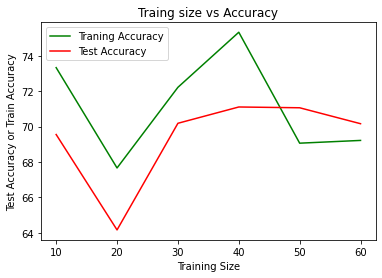

In [47]:
#graph between  training Accuracy vs train_size and testing Accuracy vs train_size
x_axis = [10,20,30,40,50,60]
plt.plot(x_axis,training_Accuracy,'g-',label='Traning Accuracy')
plt.plot(x_axis,testing_Accuracy,'r-',label='Test Accuracy')
plt.title("Traing size vs Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Test Accuracy or Train Accuracy")
plt.legend()
plt.show()

# **Q2.Multi layer perceptron for Iris Dataset**

In [88]:
#Activation function

def sigmoid(Z):
  return 1/(1+np.exp(-Z))

In [89]:
#for back propagation sigmoid derivative

def derivative_sigmoid(dA ,Z):
  return dA * sigmoid(Z) * (1 - sigmoid(Z))

In [90]:
def linear_backward(dZ,input,weight,bias):
 
    m = input.shape[1]
    #print(m)

    dW = np.dot(dZ, input.T) / m
    db = np.squeeze(np.sum(dZ, axis=1, keepdims=True)) / m
    dA_prev = np.dot(weight.T, dZ)
    try:
      db = db.reshape(-1, 1)
    except:
      db = [[db]]
    
    return dA_prev, dW, db

In [91]:
def linear_activation_backward(dA, cache,input,weight,bias):   
    
    dZ = derivative_sigmoid(dA,cache)
    
    dA_prev, dW, db = linear_backward(dZ,input,weight,bias) 
    return dA_prev, dW, db

In [92]:
#train model


def Train_MLP(input,output,hidden_layer,epoch,learning_rate):




  parameters = {}
 
  weight_1 = np.random.randn(hidden_layer,input.T.shape[1]) * 0.01  #for input layer
  weight_2 = np.random.randn(output.T.shape[1],hidden_layer) * 0.01  #for hidden layer
  input_bias = np.random.randn(hidden_layer,1) * 0.01
  hidden_bias = np.random.randn(output.T.shape[1],1) * 0.01

  for i in range(epoch):

    #forword propagation

  
    
    Z = np.dot(weight_1,input) + input_bias
    A1 = sigmoid(Z)
    Z1 = np.dot(weight_2,A1) + hidden_bias
    A2 = sigmoid(Z1)

    #backword propogation

    
    m= len(output.T)

    dA2  = output-A2
    dA1, dW2, db2 = linear_activation_backward(dA2, Z1,A1,weight_2,hidden_bias)
    dA0, dW1, db1 = linear_activation_backward(dA1, Z,input,weight_1,input_bias)

    weight_1 = weight_1 + learning_rate * dW1 
    input_bias = input_bias + learning_rate * db1 
    weight_2 = weight_2 + learning_rate * dW2 
    hidden_bias = hidden_bias + learning_rate * db2 

   
  parameters = { "W1": weight_1,
                  "b1": input_bias,
                  "W2": weight_2,
                  "b2": hidden_bias}
  return parameters

In [93]:
#prediction for a input

def model_test(X,cache):

  Z = np.dot(cache["W1"],X) + cache['b1']
  As = sigmoid(Z)
  Z1 = np.dot(cache["W2"],As) + cache["b2"]
  ar = sigmoid(Z1)

  return ar

In [94]:
#multiple prediction


def predict_MLP(X, parameters):
  
    prob0 = model_test(X, parameters[0])[0].reshape(-1, 1)
    prob1 = model_test(X, parameters[1])[0].reshape(-1, 1)
    prob2 = model_test(X, parameters[2])[0].reshape(-1, 1)
    
    predictions = np.hstack((prob0, prob1, prob2))
    #print(predictions)
    
    return np.argmax(predictions, axis=1).reshape(X.shape[1], 1)

In [95]:
#Accuracy function

def score_MLP(result,label):
   
    difference = result - np.array(label)
    num_correct = 0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            num_correct += 1

    score = num_correct * 100 / difference.size
    return score

In [96]:

def MLP_train_test_score(x_train, y_train, y_class, x_test, y_test):

  hidden_layer = 7

  parameter0 = Train_MLP(x_train.T, y_class[0].T,hidden_layer,1000,0.5)
  parameter1 = Train_MLP(x_train.T, y_class[1].T,hidden_layer,1000,0.5)
  parameter2 = Train_MLP(x_train.T, y_class[2].T,hidden_layer,1000,0.5)

  train_prediction = predict_MLP(x_train.T, [parameter0, parameter1, parameter2])
  train_score = score_MLP(train_prediction, y_train.to_numpy())

  test_prediction = predict_MLP(x_test.T, [parameter0, parameter1, parameter2])
  test_score = score_MLP(test_prediction, y_test.to_numpy())

  return train_score, test_score

In [97]:

def MLP_split_for_score(X,Y,size):
  train_score, test_score = 0,0
  for i in range(10):
    X_train, X_test, Y_train, Y_test = tts(X, Y, train_size=size)

    y_class0 = np.where(Y_train == 0, 1, 0)
    y_class1 = np.where(Y_train == 1, 1, 0)
    y_class2 = np.where(Y_train == 2, 1, 0)
    
    
    score_train, score_test = MLP_train_test_score(X_train, Y_train, [y_class0, y_class1, y_class2], X_test, Y_test)

    train_score += score_train
    test_score += score_test

  return train_score/10, test_score/10

In [98]:
MLP_training_Acc = []
MLP_testing_Acc = []

* **FOR TRAINING DATA 10%**

In [99]:
train_size = 0.1

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))


MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

FOR TRAIN SIZE :10.0%
Training Accuracy  : 96.00%
Testing Accuracy  : 88.22%


* **FOR TRAINING DATA 20%**

In [100]:
train_size = 0.2

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)


print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

FOR TRAIN SIZE :20.0%
Training Accuracy  : 92.33%
Testing Accuracy  : 87.25%


* **FOR TRAINING DATA 30%**

In [101]:
train_size = 0.3

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

FOR TRAIN SIZE :30.0%
Training Accuracy  : 96.67%
Testing Accuracy  : 92.48%


* **FOR TRAINING DATA 40%**

In [102]:
train_size = 0.4

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

FOR TRAIN SIZE :40.0%
Training Accuracy  : 95.83%
Testing Accuracy  : 94.67%


* **FOR TRAINING DATA 50%**

In [103]:
train_size = 0.5

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

FOR TRAIN SIZE :50.0%
Training Accuracy  : 97.07%
Testing Accuracy  : 95.73%


* **FOR TRAINING DATA 60%**

In [104]:
train_size = 0.6

train_acc , test_acc = MLP_split_for_score(X,Y,train_size)

print("FOR TRAIN SIZE :{}%".format(train_size*100))

print("Training Accuracy  : {:.2f}%".format(train_acc))

print("Testing Accuracy  : {:.2f}%".format(test_acc))

MLP_training_Acc.append(train_acc)
MLP_testing_Acc.append(test_acc)

FOR TRAIN SIZE :60.0%
Training Accuracy  : 97.56%
Testing Accuracy  : 96.83%


In [105]:
print(MLP_training_Acc)
print(MLP_testing_Acc)

[96.00000000000001, 92.33333333333333, 96.66666666666667, 95.83333333333333, 97.06666666666666, 97.55555555555556]
[88.22222222222223, 87.25000000000001, 92.47619047619047, 94.66666666666667, 95.73333333333333, 96.83333333333333]


* **FINAL OUTCOME TABLE**

In [106]:
# final outcome table

Amount_of_training_data = ['10%','20%','30%','40%','50%','60%']
Table = pd.DataFrame()
Table['Amount_of_training_data'] = Amount_of_training_data 
Table['Training Accuracy'] = MLP_training_Acc
Table['Test Accuracy'] = MLP_testing_Acc 
Table.to_csv('MLP_table_data.csv')
Table

,Amount_of_training_data,Training Accuracy,Test Accuracy
0,10%,96.000000,88.222222
1,20%,92.333333,87.250000
2,30%,96.666667,92.476190
3,40%,95.833333,94.666667
4,50%,97.066667,95.733333
5,60%,97.555556,96.833333


* **PLOTTING CURVE BETWEEN TRAINING DATA SIZE VS TEST AND TRAIN ACCURACY**

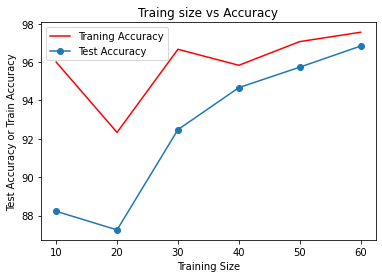

In [107]:
# graph between training data size vs (test accuracy and train accuracy)

x_axis = [10,20,30,40,50,60]
plt.plot(x_axis,MLP_training_Acc,'r-',label='Traning Accuracy')
plt.plot(x_axis,MLP_testing_Acc,'o-',label='Test Accuracy')
plt.title("Traing size vs Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Test Accuracy or Train Accuracy")
plt.legend()
plt.show()